<a href="https://colab.research.google.com/github/timothycho01/FEH-Gacha-Statistical-Simulator/blob/main/FEH_Gacha_Statistical_Simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uses Google Colab Features To Change Parameters
<div>
<img src="https://drive.google.com/uc?id=1cMzbXGbtDXMSTcI8RWloiNwo1li2qw0O" width="500"/>
</div>




In [ ]:
import random
import pandas as pd
from IPython.display import HTML, display
import matplotlib.pyplot as plt
import time
#@title # Set Banner Settings { run: "auto", form-width: "35%" }
#@markdown ---
Selected_Banner = "(3%/3%) Normal" #@param ["(3%/3%) Normal", "(4%/2%) Weekly Revival", "(5%/3%) Hero Fest", "(4%/2%) Double Special Heroes", "(8%/0%) Legendary / Mythic"]
#@markdown ---
#@title ## Markdown
#@markdown 5★ Focus
R_5_Star_Focus = 1 #@param {type:"integer"}
B_5_Star_Focus = 1 #@param {type:"integer"}
G_5_Star_Focus = 1 #@param {type:"integer"}
C_5_Star_Focus = 1 #@param {type:"integer"}
#@markdown ---
#@title ## Markdown
#@markdown 4★ Focus 
#@markdown (Only Works for "Normal" and "Double Special Heroes")
R_4_Star_Focus = 1 #@param {type:"integer"}
B_4_Star_Focus = 0 #@param {type:"integer"}
G_4_Star_Focus = 0 #@param {type:"integer"}
C_4_Star_Focus = 0 #@param {type:"integer"}
#@markdown ---
#@title ## Markdown
#@markdown Set Seed Value (Optional)
Seed_Value = 315803958 #@param {type:"integer"}

if Seed_Value == 0:
  random.seed()
else:
  random.seed(Seed_Value)

input_5_star_focus = [R_5_Star_Focus, 
                      B_5_Star_Focus, 
                      G_5_Star_Focus, 
                      C_5_Star_Focus]

input_4_star_focus = [R_4_Star_Focus, 
                      B_4_Star_Focus, 
                      G_4_Star_Focus, 
                      C_4_Star_Focus]

In [ ]:
#@title # Set Summoning Targets { run: "auto", form-width: "35%" }
#@markdown ---
# Goal = "All of these Goals" #@param ["Any of these Goals", "All of these Goals"]
# #@markdown ---
Goal_1 = "5\u2605 Focus Unit" #@param ["Any 5★ Unit", "5★ Focus Unit", "4★ Focus Unit"]
Goal_1_Color = "Green" #@param ["Any Color", "Red", "Blue", "Green", "Colorless"]
Goal_1_Count = 1 #@param {type:"integer"}
#@markdown ---
Goal_2 = "5\u2605 Focus Unit" #@param ["Any 5★ Unit", "5★ Focus Unit", "4★ Focus Unit"]
Goal_2_Color = "Blue" #@param ["Any Color", "Red", "Blue", "Green", "Colorless"]
Goal_2_Count = 0 #@param {type:"integer"}
#@markdown ---
Goal_3 = "Any 5\u2605 Unit" #@param ["Any 5★ Unit", "5★ Focus Unit", "4★ Focus Unit"]
Goal_3_Color = "Green" #@param ["Any Color", "Red", "Blue", "Green", "Colorless"]
Goal_3_Count = 0 #@param {type:"integer"}
#@markdown ---
Goal_4 = "5\u2605 Focus Unit" #@param ["Any 5★ Unit", "5★ Focus Unit", "4★ Focus Unit"]
Goal_4_Color = "Colorless" #@param ["Any Color", "Red", "Blue", "Green", "Colorless"]
Goal_4_Count = 0 #@param {type:"integer"}

goal_df = pd.DataFrame([['','',0,0]],
                       columns=['target', 'color', 'target_count', 'curr_count'])
goal_1_df = pd.DataFrame([[Goal_1, Goal_1_Color, Goal_1_Count, 0]], 
                          columns=['target', 'color', 'target_count', 'curr_count'],
                          index=[0])
goal_2_df = pd.DataFrame([[Goal_2, Goal_2_Color, Goal_2_Count, 0]], 
                          columns=['target', 'color', 'target_count', 'curr_count'],
                          index=[1])
goal_3_df = pd.DataFrame([[Goal_3, Goal_3_Color, Goal_3_Count, 0]],
                          columns=['target', 'color', 'target_count', 'curr_count'],
                          index=[2])
goal_4_df = pd.DataFrame([[Goal_4, Goal_4_Color, Goal_4_Count, 0]], 
                          columns=['target', 'color', 'target_count', 'curr_count'],
                          index=[3])

goal_df = pd.concat([goal_df, goal_1_df])
goal_df = pd.concat([goal_df, goal_2_df])
goal_df = pd.concat([goal_df, goal_3_df])
goal_df = pd.concat([goal_df, goal_4_df])

goal_df = goal_df[goal_df['target_count'] > 0]



# alt_summon_colors = [color for color in ['Red', 'Blue', 'Green', 'Colorless'] if color not in target_summon_colors]
display(goal_df)



,target,color,target_count,curr_count
0,5★ Focus Unit,Green,1,0


In [ ]:
#@title # Set Up Summoning Pools { run: "auto", form-width: "45%" }
#@markdown ---
#@title ## Markdown
#@markdown Will Pull Summoning Pool Size From: https://feheroes.fandom.com/wiki/Summonable_Heroes
#@title ## Markdown
#@markdown Check The Follow To Customize Your Own Summoning Pool Instead
Use_Custom_Pools = False #@param {type:"boolean"}
#@markdown ---
#@title ## Markdown
#@markdown - Focus Pools Will Be Added From Your Settings In "Banner Settings"
#@title ## Markdown
#@markdown - Default: '5_star_pool', '4_star_special', '4_star_pool', '3_star_pool', '4_star_shsr'
Custom_Columns = "'5_star_pool', '4_star_special', '4_star_pool', '3_star_pool', '4_star_shsr'" #@param {type:"string"}
Custom_R_Pool = "27, 55, 41, 41, 12" #@param {type:"string"}
Custom_B_Pool = "27, 37, 43, 43, 17" #@param {type:"string"}
Custom_G_Pool = "22, 32, 35, 35, 22" #@param {type:"string"}
Custom_C_Pool = "20, 25, 40, 40, 18" #@param {type:"string"}
#@markdown ---
if Use_Custom_Pools:
  input_columns_list = [i for i in Custom_Columns.split("\'") if "_" in i][:5]
  Custom_R_Pool = [int(i) for i in Custom_R_Pool.split(',')][:5]
  Custom_B_Pool = [int(i) for i in Custom_B_Pool.split(',')][:5]
  Custom_G_Pool = [int(i) for i in Custom_G_Pool.split(',')][:5]
  Custom_C_Pool = [int(i) for i in Custom_C_Pool.split(',')][:5]
  custom_summoning_pool = pd.DataFrame([Custom_R_Pool, 
                                        Custom_B_Pool, 
                                        Custom_G_Pool, 
                                        Custom_C_Pool
                                        ],
                                      columns=input_columns_list,
                                      index=['Red', 'Blue', 'Green', 'Colorless'],
                                      )
  display(custom_summoning_pool)
  general_df = pd.DataFrame([['5_star_focus', 0.03],
                           ['5_star_pool', 0.03],
                           ['4_star_special', 0.03],
                           ['4_star_pool', 0.55],
                           ['3_star_pool', 0.36]
                           ],
                          columns= ['rarity_pool', 'rate']
                          )

general_4_df = pd.DataFrame([['5_star_focus', 0.03],
                             ['5_star_pool', 0.03],
                             ['4_star_focus', 0.03],
                             ['4_star_special', 0.03],
                             ['4_star_pool', 0.52],
                             ['3_star_pool', 0.36]
                             ],
                             columns= ['rarity_pool', 'rate']
                             )

weekly_revival_df = pd.DataFrame([['5_star_focus', 0.04],
                                  ['5_star_pool', 0.02],
                                  ['4_star_special', 0.03],
                                  ['4_star_pool', 0.55],
                                  ['3_star_pool', 0.36]
                                  ],
                                 columns= ['rarity_pool', 'rate']
                                 )

hero_fest_df = pd.DataFrame([['5_star_focus', 0.05],
                             ['5_star_pool', 0.03],
                             ['4_star_special', 0.03],
                             ['4_star_pool', 0.55],
                             ['3_star_pool', 0.34]
                             ],
                            columns= ['rarity_pool', 'rate']
                            )

double_special_df = pd.DataFrame([['5_star_focus', 0.06],
                                  ['4_star_special', 0.03],
                                  ['4_star_pool', 0.57],
                                  ['3_star_pool', 0.34]
                                  ],
                                 columns= ['rarity_pool', 'rate']
                                 )

double_special_4_df = pd.DataFrame([['5_star_focus', 0.06],
                                    ['4_star_focus', 0.03],
                                    ['4_star_special', 0.03],
                                    ['4_star_pool', 0.54],
                                    ['3_star_pool', 0.34]
                                    ],
                                   columns= ['rarity_pool', 'rate']
                                   )

legendary_mythic_df = pd.DataFrame([['5_star_focus', 0.08],
                                    ['4_star_special', 0.03],
                                    ['4_star_pool', 0.55],
                                    ['3_star_pool', 0.34]
                                    ],
                                   columns= ['rarity_pool', 'rate']
                                   )

# "(3%/3%) Normal": general_df,
# "(3%/3%) Normal + 4 Star Focus": general_4_df,
# "(4%/2%) Weekly Revival": weekly_revival_df,
# "(5%/3%) Hero Fest": hero_fest_df,
# "(4%/2%) Double Special Heroes": double_special_df,
# "(4%/2%) Double Special Heroes + 4 Star Focus": double_special_4_df,
# "(8%/0%) Legendary / Mythic": legendary_mythic_df,

if Use_Custom_Pools:
  summoning_pool = custom_summoning_pool.copy(deep=True)
else:
  feh_wiki_tables = pd.read_html("https://feheroes.fandom.com/wiki/Summonable_Heroes")
  summoning_pool = feh_wiki_tables[1]
  summoning_pool = summoning_pool.set_index('Rarity')
  summoning_pool.columns = ['5_star_pool', '4_star_special', '4_star_pool', '3_star_pool', '4_star_shsr']
  summoning_pool.index.names = [None]

summoning_pool['5_star_focus'] = input_5_star_focus
summoning_pool['4_star_focus'] = input_4_star_focus

In [ ]:
#@title # Run Simulation { form-width: "25%" }
samples = 2000 #@param {type:"integer"}

def progress(value, max):
    return HTML("""
        <progress
            value='{value}'
            max='{max}',
            style='width: 50%'
        >
            {value}
        </progress>
    """.format(value=value, max=max))

out = display(progress(0, samples), display_id=True)

def change_5_star_rates(rate_change, curr_rates, split_5_star_focus):
  if split_5_star_focus:
    curr_rates.loc[
        (curr_rates['rarity_pool'] == '5_star_focus') | 
        (curr_rates['rarity_pool'] == '5_star_pool'),
        'rate'
        ] += rate_change / 2
  else:
    curr_rates.loc[
        (curr_rates['rarity_pool'] == '5_star_focus'),
        'rate'
        ] += rate_change
  non_5_star_rate_sum = curr_rates.loc[
      (curr_rates['rarity_pool'] != '5_star_focus') & 
      (curr_rates['rarity_pool'] != '5_star_pool'),
      'rate'
      ].sum()
  if non_5_star_rate_sum != 0:
    curr_rates.loc[
        (curr_rates['rarity_pool'] != '5_star_focus') & 
        (curr_rates['rarity_pool'] != '5_star_pool'),
        'rate'
        ] *= 1 - rate_change * (1 / non_5_star_rate_sum)

  return curr_rates

def max_5_star_rates(curr_rates, split_5_star_focus):
  set_rate = 1.00
  if split_5_star_focus:
    curr_rates.loc[
        (curr_rates['rarity_pool'] == '5_star_focus') | 
        (curr_rates['rarity_pool'] == '5_star_pool'),
        'rate'
        ] = set_rate / 2
  else:
    curr_rates.loc[
        (curr_rates['rarity_pool'] == '5_star_focus'),
        'rate'
        ] = set_rate
  curr_rates.loc[
      (curr_rates['rarity_pool'] != '5_star_focus') & 
      (curr_rates['rarity_pool'] != '5_star_pool'),
      'rate'
      ] = 0

  return curr_rates

if Selected_Banner == "(3%/3%) Normal":
  has_split_5_star_focus = True
  if sum(input_4_star_focus) == 0:
    banner_curr_rates_df = general_df.copy(deep=True)
    banner_base_rates_df = general_df.copy(deep=True)
  else:
    banner_curr_rates_df = general_4_df.copy(deep=True)
    banner_base_rates_df = general_4_df.copy(deep=True)
elif Selected_Banner ==  "(4%/2%) Weekly Revival":
  has_split_5_star_focus = True
  banner_curr_rates_df = weekly_revival_df.copy(deep=True)
  banner_base_rates_df = weekly_revival_df.copy(deep=True)
elif Selected_Banner ==  "(5%/3%) Hero Fest":
  has_split_5_star_focus = True
  banner_curr_rates_df = hero_fest_df.copy(deep=True)
  banner_base_rates_df = hero_fest_df.copy(deep=True)
elif Selected_Banner ==  "(4%/2%) Double Special Heroes":
  has_split_5_star_focus = False
  if sum(input_4_star_focus) == 0:
    banner_curr_rates_df = double_special_df.copy(deep=True)
    banner_base_rates_df = double_special_df.copy(deep=True)
  else:
    banner_curr_rates_df = double_special_4_df.copy(deep=True)
    banner_base_rates_df = double_special_4_df.copy(deep=True)
elif Selected_Banner ==  "(8%/0%) Legendary / Mythic":
  has_split_5_star_focus = False
  banner_curr_rates_df = legendary_mythic_df.copy(deep=True)
  banner_base_rates_df = legendary_mythic_df.copy(deep=True)

test_record = []
perform = []

for tests in range(samples):
  # st = time.time()
  orb_costs = [5, 4, 4, 4, 3] # orb cost progression
  reset_rates = False
  pity_120 = False
  non_5_star_cnt = 0
  circle_cnt = 0
  orbs_spent = 0
  total_summons = 0
  decrease_5_star_rates_factor = 0

  run = True
  run_goal_df = goal_df.copy(deep=True)

  target_colors_by_count = run_goal_df.groupby(by="color").sum().sort_values('target_count', ascending=False)
  target_summon_colors = list(target_colors_by_count['target_count'].index)
  only_goal_any_color = len(target_summon_colors) == 1 and 'Any Color' in target_summon_colors

  while run:

    if reset_rates:
      reset_rates = False
      non_5_star_cnt = 0
      banner_curr_rates_df = banner_base_rates_df.copy(deep=True)
    elif pity_120:
      pity_120 = False
      non_5_star_cnt = 100
      banner_curr_rates_df = banner_base_rates_df.copy(deep=True)
      banner_curr_rates_df = change_5_star_rates(0.10, banner_curr_rates_df, has_split_5_star_focus)
    elif decrease_5_star_rates_factor > 0:
      non_5_star_cnt = 0
      banner_curr_rates_df = change_5_star_rates(-0.02, banner_curr_rates_df, has_split_5_star_focus)
      curr = round(banner_curr_rates_df.iloc[0]['rate'],4)
      base = round(banner_base_rates_df.iloc[0]['rate'],4)
      if curr < base:
        banner_curr_rates_df = banner_base_rates_df.copy(deep=True)
    elif non_5_star_cnt >= 120:
      pity_120 = True
      max_5_star_rates(banner_curr_rates_df, has_split_5_star_focus)
    elif non_5_star_cnt >= 5:
      non_5_star_cnt = 0
      banner_curr_rates_df = change_5_star_rates(0.005, banner_curr_rates_df, has_split_5_star_focus)

    circle_cnt += 1

    # determine rarity_pools of summoning stones based on their rate
    circle = random.choices(population=banner_curr_rates_df['rarity_pool'], weights=banner_curr_rates_df['rate'], k = 5)
    circle_heroes = []

    for r in circle:
      # determine color of summoning stone based on proportion within the rarity pool
      color = random.choices(['Red', 'Blue', 'Green', 'Colorless'], summoning_pool[r] / summoning_pool[r].sum())[0]

      pop_of_rarity_color = summoning_pool.loc[color, r]
      hero_id = random.choices(range(pop_of_rarity_color))[0]
      circle_heroes.append([r, color, hero_id])

    circle_heroes_df = pd.DataFrame(circle_heroes, columns=['rarity_pool', 'color', 'id'])

    curr_circle_summon_cnt = 0 
    decrease_5_star_rates_factor = 0
    update_target_color = False

    for i in range(len(circle_heroes_df)):
      i_color = circle_heroes_df.iloc[i]['color']
      if update_target_color:
        update_target_color = False
        remaining_goals_df = run_goal_df[run_goal_df['curr_count'] < run_goal_df['target_count']]
        target_colors_by_count = remaining_goals_df.groupby(by="color").sum().sort_values('target_count', ascending=False)
        target_summon_colors = list(target_colors_by_count['target_count'].index)
        only_goal_any_color = len(target_summon_colors) == 1 and 'Any Color' in target_summon_colors
      
      summon = False
      if i_color in target_summon_colors or only_goal_any_color:
        summon = True
      elif i == 4 and curr_circle_summon_cnt == 0:
        summon = True

      if summon:
        total_summons += 1
        curr_circle_summon_cnt += 1
        i_rarity = circle_heroes_df.iloc[i]['rarity_pool']
        i_unit_number = circle_heroes_df.iloc[i]['id']

        if i_rarity == '5_star_focus':
          reset_rates = True
        elif i_rarity == '5_star_pool':
          decrease_5_star_rates_factor += 1
        else:
          non_5_star_cnt += 1

        if total_summons != 1:
          orbs_spent += orb_costs[curr_circle_summon_cnt - 1]

        diff_5_id = 0
        diff_4_id = 0
        goals_met = 0
        num_of_goals = len(run_goal_df)
      
        for g in list(run_goal_df.index):
          
          g_target = run_goal_df.loc[g, 'target']
          g_color = run_goal_df.loc[g, 'color']
          g_target_count = run_goal_df.loc[g, 'target_count']
          g_curr_count = run_goal_df.loc[g, 'curr_count']
          rarity_match = False
          color_match = False
          if g_curr_count < g_target_count:
            color_match = (g_color == 'Any Color' or i_color == g_color)

            if g_target == "Any 5★ Unit":
              rarity_match = i_rarity in ['5_star_focus', '5_star_pool']
            elif g_target == "5★ Focus Unit":
              rarity_match = (i_rarity == '5_star_focus') and (i_unit_number == 0 + diff_5_id)
              diff_5_id += 1
            elif g_target == "4★ Focus Unit":
              rarity_match = (i_rarity == '4_star_focus') and (i_unit_number == 0 + diff_4_id)
              diff_4_id += 1

            if color_match and rarity_match:
              run_goal_df.loc[g,'curr_count'] += 1
              g_curr_count = run_goal_df.loc[g, 'curr_count']
              if g_curr_count >= g_target_count:
                goals_met += 1

          else:
            goals_met += 1
            # update target colors to summon based on remaining goals for the run

          if g_curr_count == g_target_count:
            update_target_color = True

          if goals_met == num_of_goals:
            run = False
            break

      if not run:
        break
    # print("-")
    # print(banner_curr_rates_df)
    # print("-")
    # print(circle_heroes_df.head(curr_circle_summon_cnt))
    # print("-")
    # print(run_goal_df)
    # print()
  # et = time.time()
  # elapsed = (round((et - st), 6))
  # perform.append(elapsed)
  # print("Total Summons:", total_summons)
  # print("Orbs Spent:", orbs_spent, elapsed)
  test_record.append([total_summons, orbs_spent])
  out.update(progress(tests+1, samples))
# print(len(perform), round(sum(perform) / len(perform),4), max(perform), min(perform), round(sum(perform),4))
test_record_df = pd.DataFrame(test_record,
                              columns=['summons', 'orbs spent'])

,target,color,target_count,curr_count
0,5★ Focus Unit,Green,1,0


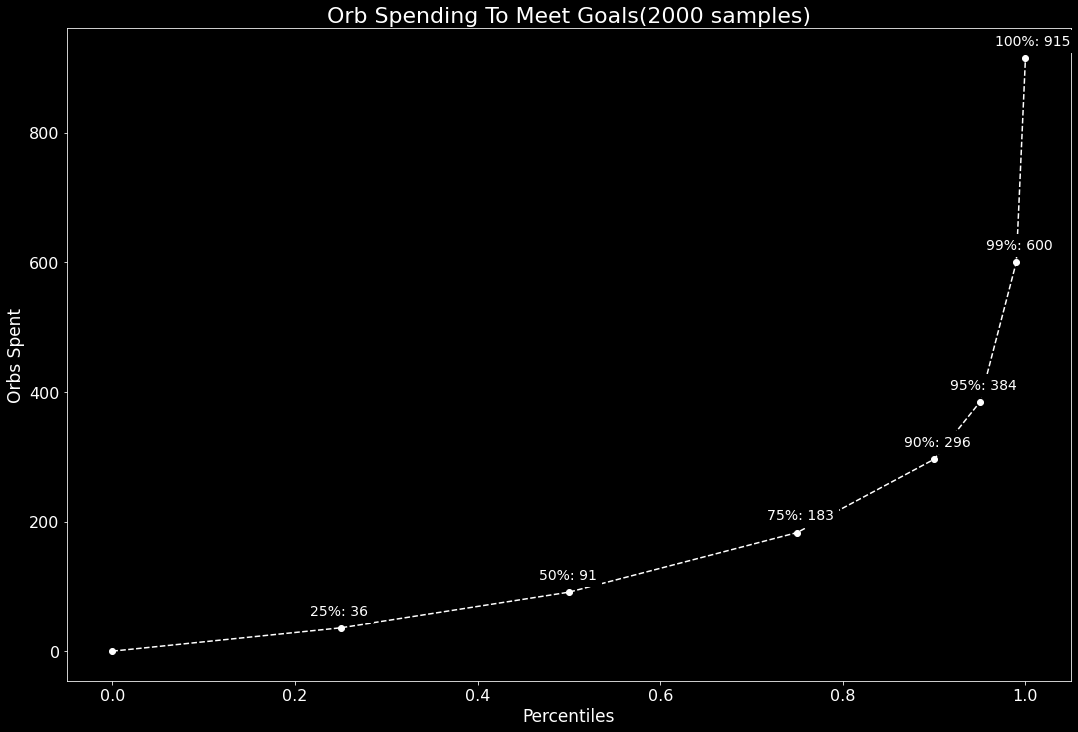

In [95]:
#@title # Display Chart
perc = [0, .25, .50, .75, .90, .95, .99, 1]
stats = test_record_df.describe(percentiles=perc).round(2)
x = perc
y = stats[4:-1]['orbs spent']
fig, ax = plt.subplots(figsize=(18,12))
plt.style.use('dark_background')
plt.plot(x, y, '--wo', label='line with marker')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Percentiles", size=17)
plt.ylabel("Orbs Spent", size=17)
plt.title("Orb Spending To Meet Goals("+ str(samples) + " samples)" , size=22)
plt.style.use('dark_background')

for index in range(len(x)):
  if index != 0:
    ax.text(x[index] - 0.033, y[index] + 20, str(round(x[index]*100)) + "%: " + str(round(y[index])), size=14, backgroundcolor='black')

display(goal_df)
print()
plt.show()